In [1]:
# configure logging
from logging import Formatter
from logging import getLogger
from logging import INFO
from logging import StreamHandler

logger = getLogger(__name__)
logger.handlers.clear()
handler = StreamHandler()
handler.setLevel(INFO)
handler.setFormatter(Formatter('%(name)s - %(asctime)s - %(levelname)s - %(message)s'))
logger.addHandler(handler)

In [2]:
# we want the 2015 data
from os import walk
from os.path import join
top = '../input/' #'/kaggle/input'
for dirname, _, filenames in walk(top=top,):
    for filename in sorted(filenames):
        if '2015' in filename:
            logger.info(join(dirname, filename))

__main__ - 2023-06-14 17:26:12,930 - INFO - ../input/mortality/2015_codes.json
__main__ - 2023-06-14 17:26:12,932 - INFO - ../input/mortality/2015_data.csv


In [3]:
# load the data and report the shape and columns
from pandas import read_csv
from pandas import DataFrame

filename = '../input/mortality/2015_data.csv'
logger.info(msg='reading {}'.format(filename))
df = read_csv(filepath_or_buffer=filename, low_memory=False, )
logger.info(msg=df.shape)
logger.info(msg=df.columns.tolist())

__main__ - 2023-06-14 17:26:12,954 - INFO - reading ../input/mortality/2015_data.csv
__main__ - 2023-06-14 17:26:56,821 - INFO - (2718198, 77)
__main__ - 2023-06-14 17:26:56,822 - INFO - ['resident_status', 'education_1989_revision', 'education_2003_revision', 'education_reporting_flag', 'month_of_death', 'sex', 'detail_age_type', 'detail_age', 'age_substitution_flag', 'age_recode_52', 'age_recode_27', 'age_recode_12', 'infant_age_recode_22', 'place_of_death_and_decedents_status', 'marital_status', 'day_of_week_of_death', 'current_data_year', 'injury_at_work', 'manner_of_death', 'method_of_disposition', 'autopsy', 'activity_code', 'place_of_injury_for_causes_w00_y34_except_y06_and_y07_', 'icd_code_10th_revision', '358_cause_recode', '113_cause_recode', '130_infant_cause_recode', '39_cause_recode', 'number_of_entity_axis_conditions', 'entity_condition_1', 'entity_condition_2', 'entity_condition_3', 'entity_condition_4', 'entity_condition_5', 'entity_condition_6', 'entity_condition_7', '

In [4]:
# report the types
logger.info(msg=df.dtypes)
logger.info(msg=type(df.dtypes))

__main__ - 2023-06-14 17:26:56,848 - INFO - resident_status                 int64
education_1989_revision       float64
education_2003_revision       float64
education_reporting_flag        int64
month_of_death                  int64
                               ...   
race_imputation_flag          float64
race_recode_3                   int64
race_recode_5                   int64
hispanic_origin                 int64
hispanic_originrace_recode      int64
Length: 77, dtype: object
__main__ - 2023-06-14 17:26:56,852 - INFO - <class 'pandas.core.series.Series'>


In [5]:
# get ready to plot
%matplotlib inline
from matplotlib.pyplot import style
from matplotlib.pyplot import plot

# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plot_style = 'seaborn-v0_8-white'
style.use(plot_style)

In [6]:
from json import load
with open(file='../input/mortality/2015_codes.json', mode='r', ) as json_fp:
    codes = load(fp=json_fp, )

<Axes: xlabel='month'>

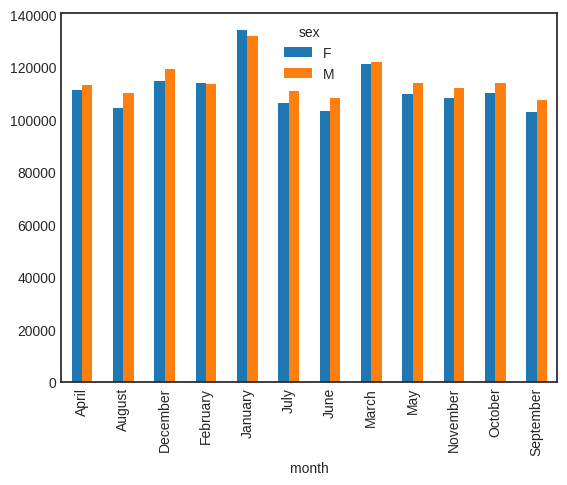

In [7]:
# plot the month of death and sex
columns_month = ['month', 'sex']
plot_month_df = df.rename(columns={'month_of_death': 'month'})[columns_month]
to_replace_month = {int(key): value for key, value in codes['month_of_death'].items()}
plot_month_df['month'] = plot_month_df['month'].replace(to_replace=to_replace_month)
plot_month_df = plot_month_df.groupby(by=columns_month).size().unstack().rename(index=to_replace_month)
plot_month_df.plot(kind='bar')

In [8]:
# plot the day of week of death and sex
columns_weekday = ['day of week', 'sex']
plot_day_df = df.rename(columns={'day_of_week_of_death': 'day of week'})[columns_weekday]
plot_day_df = plot_day_df[plot_day_df['day of week'].isin(range(1, 8))]
to_replace_weekday = {int(key): value for key, value in codes['day_of_week_of_death'].items() if int(key) in range(1, 8)}
plot_day_df = plot_day_df.groupby(by=columns_weekday).size().unstack().rename(index=to_replace_weekday)
# plot_day_df.plot(kind='bar')

<Axes: xlabel='race'>

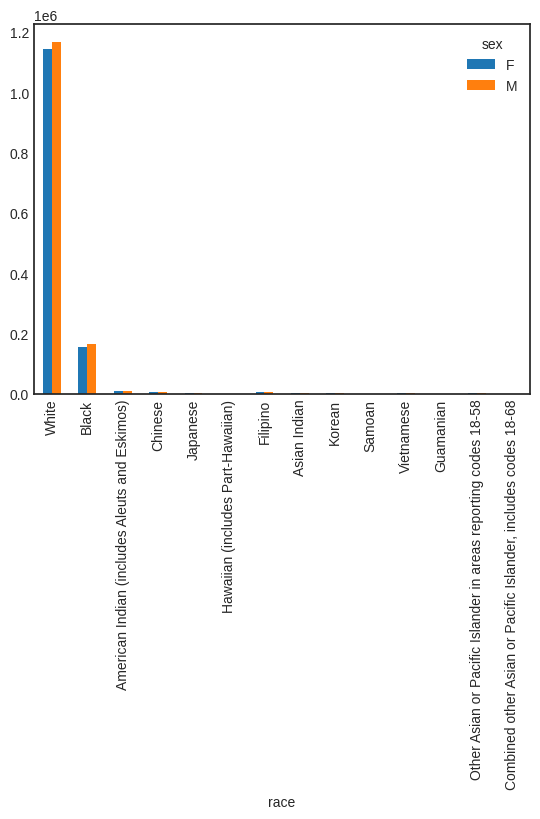

In [9]:
columns_race = ['race', 'sex']
plot_race_df = df[columns_race]
to_replace_race = {int(key): value for key, value in codes['race'].items()}
plot_race_df = plot_race_df.groupby(by=columns_race).size().unstack().rename(index=to_replace_race)
plot_race_df.plot(kind='bar',)

sex
F    Axes(0.125,0.11;0.775x0.77)
M    Axes(0.125,0.11;0.775x0.77)
Name: detail_age, dtype: object

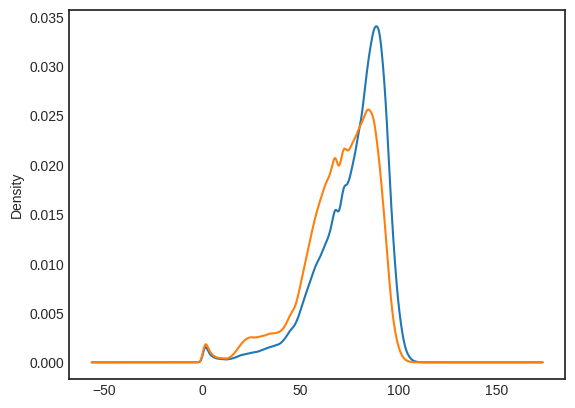

In [10]:
plot_df = df[df['detail_age'] != 999]
plot_df.groupby(by='sex')['detail_age'].plot(kind='kde')

In [11]:
for key in list(codes.keys()):
    logger.info(msg=key)

__main__ - 2023-06-14 17:28:30,543 - INFO - resident_status
__main__ - 2023-06-14 17:28:30,545 - INFO - education_1989_revision
__main__ - 2023-06-14 17:28:30,546 - INFO - education_2003_revision
__main__ - 2023-06-14 17:28:30,548 - INFO - education_reporting_flag
__main__ - 2023-06-14 17:28:30,549 - INFO - month_of_death
__main__ - 2023-06-14 17:28:30,550 - INFO - sex
__main__ - 2023-06-14 17:28:30,552 - INFO - age_substitution_flag
__main__ - 2023-06-14 17:28:30,553 - INFO - age_recode_52
__main__ - 2023-06-14 17:28:30,554 - INFO - age_recode_27
__main__ - 2023-06-14 17:28:30,555 - INFO - age_recode_12
__main__ - 2023-06-14 17:28:30,556 - INFO - infant_age_recode_22
__main__ - 2023-06-14 17:28:30,557 - INFO - place_of_death_and_decedents_status
__main__ - 2023-06-14 17:28:30,558 - INFO - marital_status
__main__ - 2023-06-14 17:28:30,559 - INFO - day_of_week_of_death
__main__ - 2023-06-14 17:28:30,560 - INFO - current_data_year
__main__ - 2023-06-14 17:28:30,562 - INFO - injury_at_wor

In [12]:
# we are done
logger.info(msg='done')

__main__ - 2023-06-14 17:28:30,623 - INFO - done
